Assignment - 4
b)

The best accuracy I got with the spam dataset is 97% ; Optimum numEpochs = 12000 and Learning rate = 0.0008

In [2]:
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [204]:
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)
trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(953, 2955) (953, 2) (105, 2955) (105, 2)


In [227]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]
numHLnodes = 5
numEpochs = 12000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [228]:
X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [229]:
weights = {
    'hiddenlayer': tf.Variable(tf.random_normal([numFeatures, numHLnodes], mean=0, stddev=(np.sqrt(6/numFeatures+numHLnodes+1)),name="weights1")),
    'outputlayer': tf.Variable(tf.random_normal([numHLnodes, numLabels], mean=0, stddev=(np.sqrt(6/numHLnodes+numLabels+1)),name="weights2"))
}


biases = {
    'b1': tf.Variable(tf.random_normal([1,numHLnodes],mean=0,stddev=(np.sqrt(6/numFeatures+numHLnodes+1)),name="bias1")),
    'b2': tf.Variable(tf.random_normal([1,numLabels],mean=0,stddev=(np.sqrt(6/numHLnodes+numLabels+1)),name="bias2"))
}


In [230]:
init_OP = tf.initialize_all_variables()

# PREDICTION ALGORITHM i.e. FEEDFORWARD ALGORITHM

#HIDDEN LAYER
apply_weights_HL = tf.matmul(X, weights['hiddenlayer'], name="apply_weights_1")
add_bias_HL = tf.add(apply_weights_HL, biases['b1'], name="add_bias1") 
activation_HL = tf.nn.sigmoid(add_bias_HL, name="activation1")

#OUTPUT LAYER
apply_weights_OP = tf.matmul(activation_HL, weights['outputlayer'], name="apply_weights_2")
add_bias_OP = tf.add(apply_weights_OP, biases['b2'], name="add_bias2") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation2")

In [231]:
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [232]:
epoch_values=[]
accuracy_values=[]
cost_values=[]
errors = []

In [233]:
sess = tf.Session()
sess.run(init_OP)
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))


# Training epochs
for i in range(numEpochs):
    sess.run([training_OP], feed_dict={X: trainX, yGold: trainY})
    print(sess.run([cost_OP], feed_dict={X: trainX, yGold: trainY}))
    accuracy_value = sess.run(accuracy_OP, feed_dict={X: testX, yGold: testY})
    errors.append(1-accuracy_value)
    print (errors[-1])

[401.86768]
0.466666638851
[396.8121]
0.466666638851
[391.47797]
0.466666638851
[385.92126]
0.466666638851
[380.2178]
0.466666638851
[374.45767]
0.466666638851
[368.73624]
0.466666638851
[363.14066]
0.466666638851
[357.73636]
0.466666638851
[352.55496]
0.466666638851
[347.59085]
0.466666638851
[342.8013]
0.466666638851
[338.11545]
0.466666638851
[333.44278]
0.466666638851
[328.68439]
0.466666638851
[323.74133]
0.466666638851
[318.52423]
0.466666638851
[312.96198]
0.466666638851
[307.01096]
0.466666638851
[300.66772]
0.466666638851
[293.98224]
0.466666638851
[287.06674]
0.466666638851
[280.09854]
0.466666638851
[273.30579]
0.466666638851
[266.9343]
0.466666638851
[261.20374]
0.466666638851
[256.26477]
0.466666638851
[252.17743]
0.466666638851
[248.91493]
0.466666638851
[246.38852]
0.476190447807
[244.47873]
0.504761904478
[243.06081]
0.504761904478
[242.02174]
0.561904758215
[241.26694]
0.533333331347
[240.72147]
0.504761904478
[240.32858]
0.466666638851
[240.0457]
0.52380952239
[239.84

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


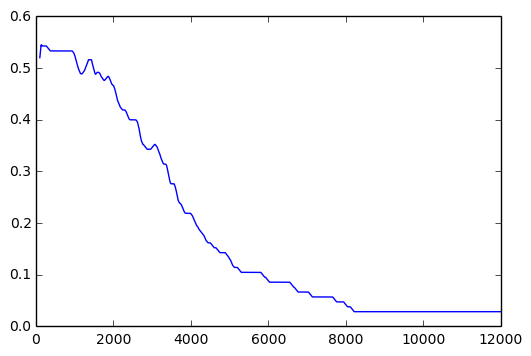

In [234]:
plt.plot([np.mean(errors[i-100:i]) for i in range(len(errors))])
plt.show() 